# Optimizers

Optimizers play a crucial role in the training of machine learning models. They are algorithms or methods used to adjust the weights and biases of the model in order to minimize the loss function and improve the model's performance. The loss function measures how well the model's predictions match the actual data, and the goal of optimization is to find the set of parameters (weights and biases) that minimize this loss.

## Gradient Decent Algorithm

Gradient Descent is one of the most fundamental and widely used optimization algorithms in machine learning and deep learning. It is the backbone of training models like linear regression, logistic regression, neural networks, and many other algorithms. The core idea behind gradient descent is to iteratively adjust the model's parameters (e.g., weights and biases) to minimize a loss function, which quantifies how well the model's predictions match the actual data.

### 1. **What is Gradient Descent?**

Gradient Descent is an iterative optimization algorithm used to minimize a function. In the context of machine learning, this function is typically the loss function, which measures the error between the predicted output of a model and the actual output.

- **Objective**: The primary goal is to find the set of parameters (e.g., weights in a neural network) that minimizes the loss function.
- **How it works**: Gradient Descent starts with an initial set of parameters, then iteratively adjusts these parameters in the opposite direction of the gradient (or slope) of the loss function with respect to those parameters.

Optimal parameters (theta): [[4.21509616]
 [2.77011339]]


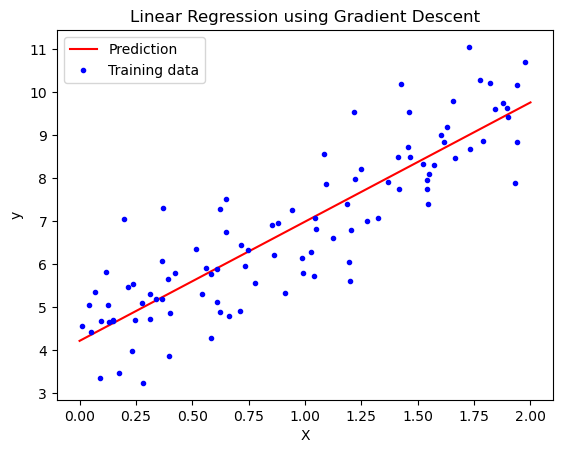

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 random values as input
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Step 2: Initialize parameters
theta = np.random.randn(2, 1)  # Random initialization of theta (weights)
learning_rate = 0.1
n_iterations = 1000
m = len(X)

# Add a bias term to X (for the intercept)
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance

# Step 3: Gradient Descent Algorithm
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
    return theta

# Step 4: Train the model using Gradient Descent
theta_optimal = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

print("Optimal parameters (theta):", theta_optimal)

# Step 5: Make predictions using the optimized theta
X_new = np.array([[0], [2]])  # New data points for prediction
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term to new data
y_predict = X_new_b.dot(theta_optimal)

# Step 6: Plot the results
plt.plot(X_new, y_predict, "r-", label="Prediction")  # Plot the regression line
plt.plot(X, y, "b.", label="Training data")  # Plot the training data
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using Gradient Descent")
plt.legend()
plt.show()


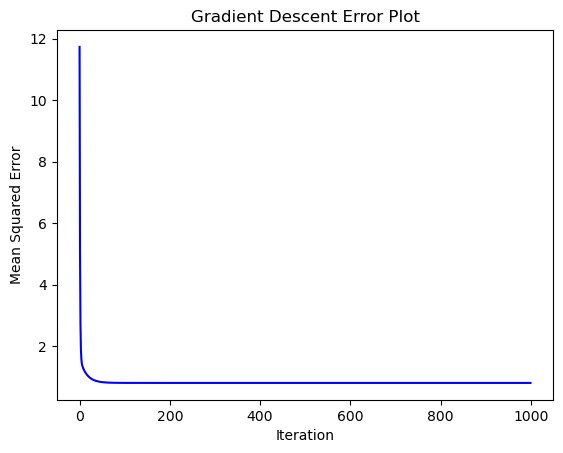

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Step 2: Add bias term to X
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance

# Step 3: Initialize parameters
theta = np.random.randn(2, 1)  # Random initialization
learning_rate = 0.1
n_iterations = 1000
m = len(X)

# Step 4: Gradient Descent with error recording
def gradient_descent_with_error(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    error_history = np.zeros(n_iterations)
    
    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        error_history[iteration] = (1/m) * np.sum((X.dot(theta) - y) ** 2)
    
    return theta, error_history

# Step 5: Train the model and record errors
theta_optimal, error_history = gradient_descent_with_error(X_b, y, theta, learning_rate, n_iterations)

# Step 6: Plot the error curve
plt.plot(range(n_iterations), error_history, "b-")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Descent Error Plot")
plt.show()


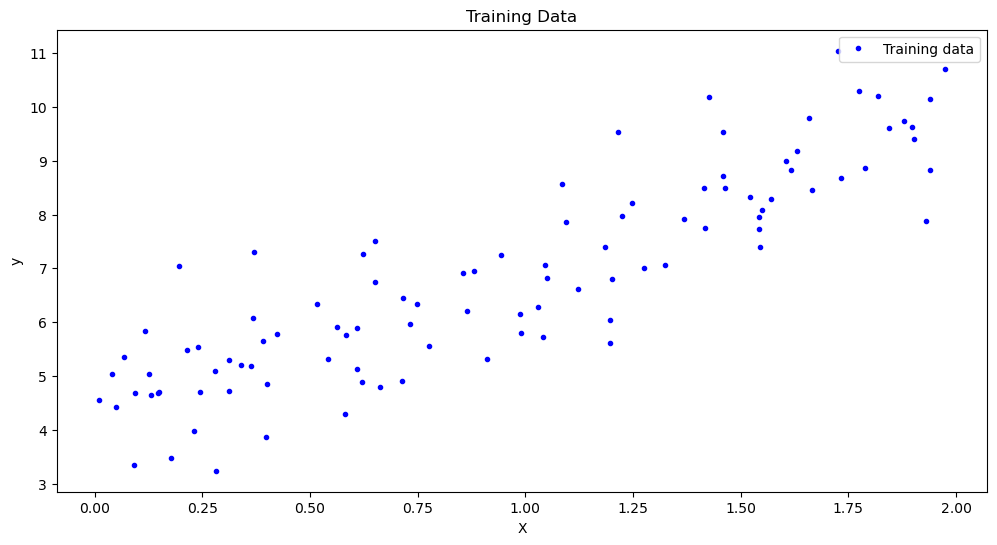

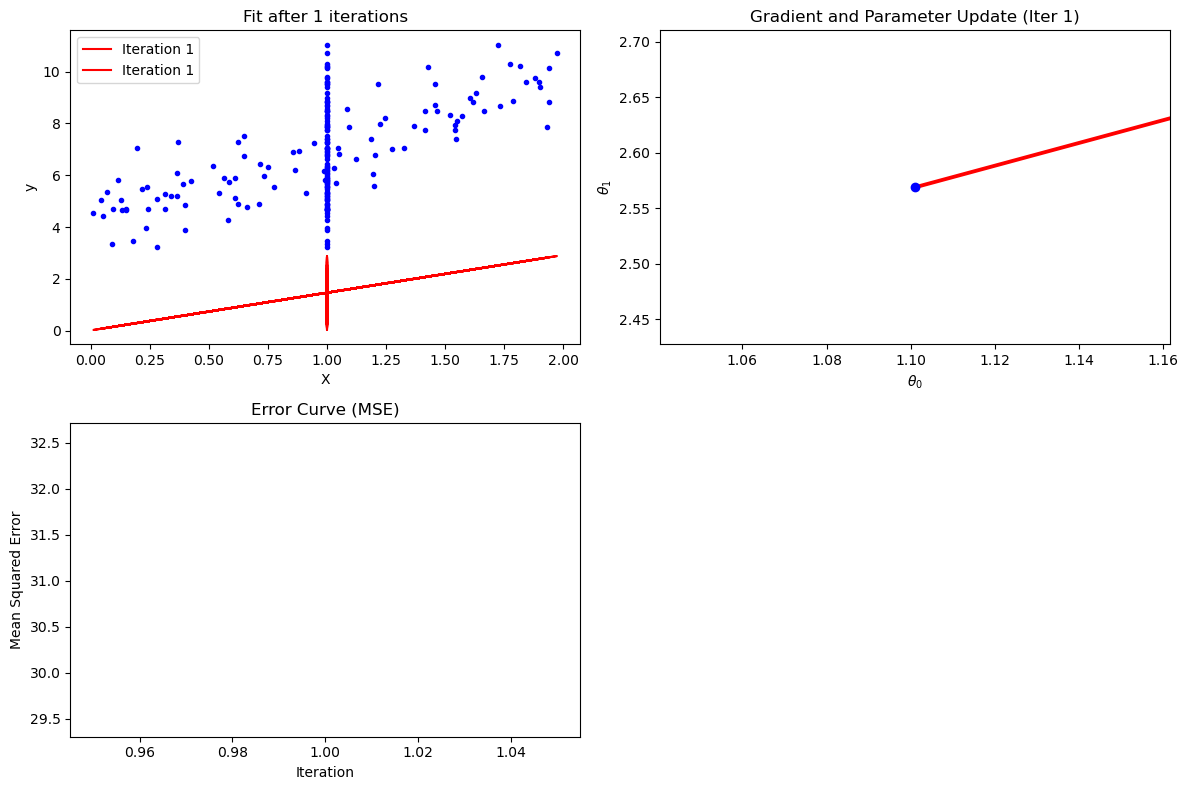

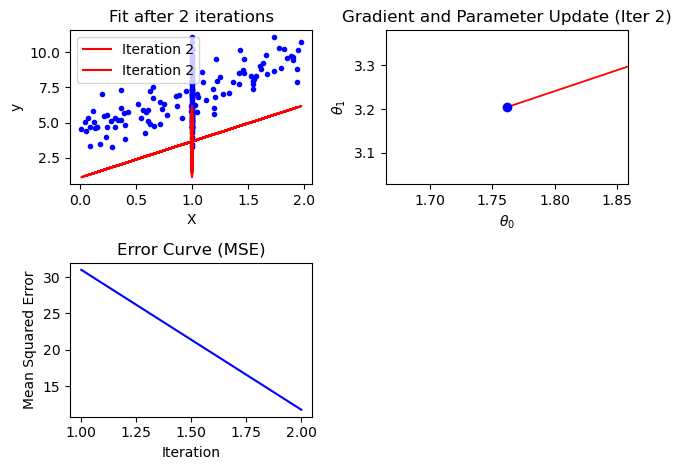

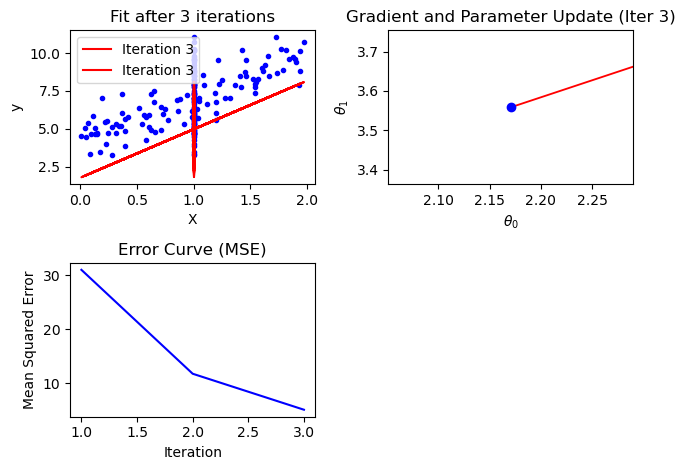

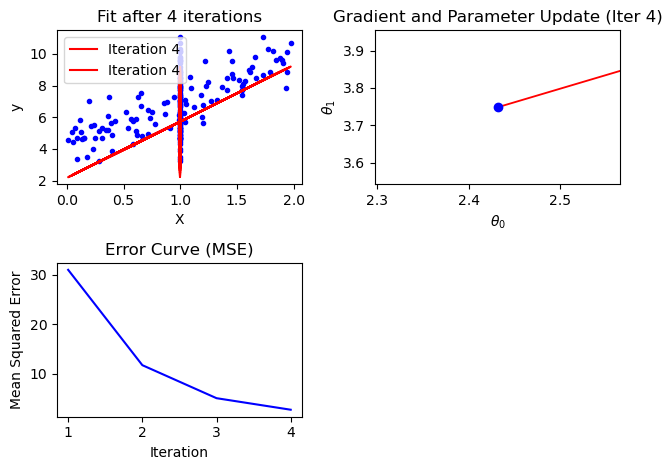

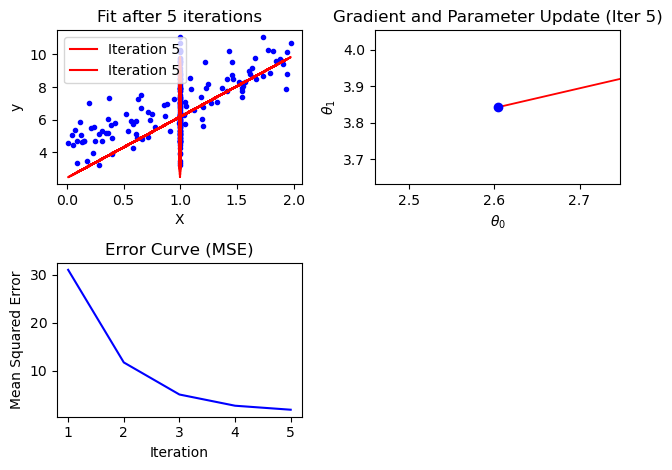

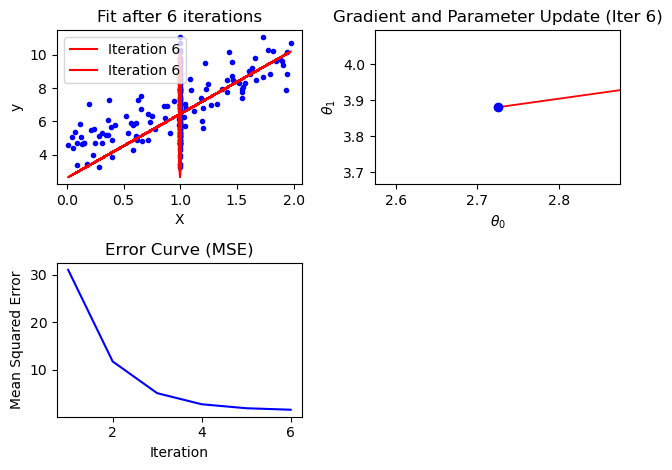

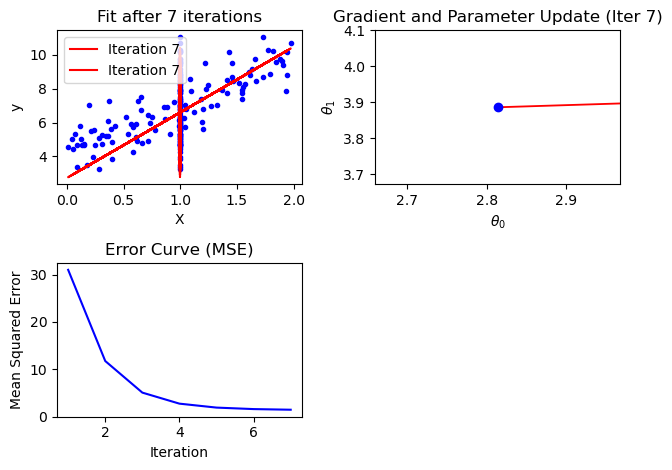

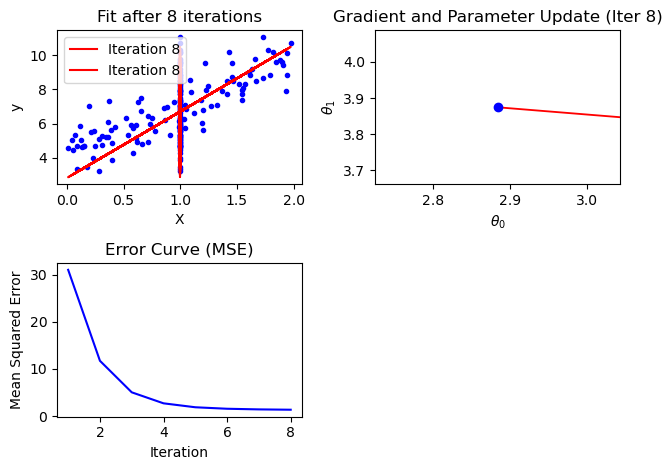

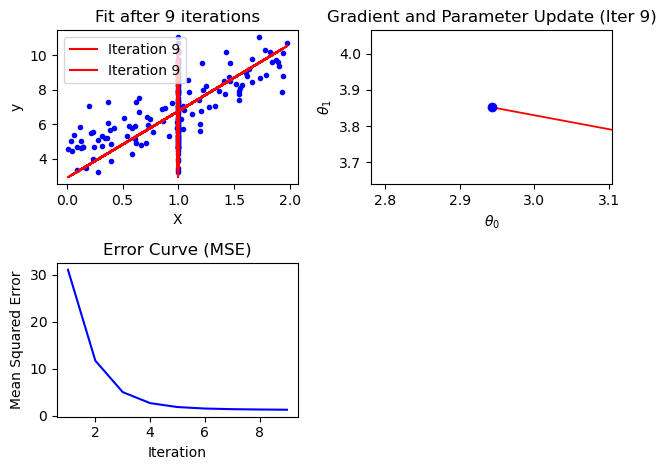

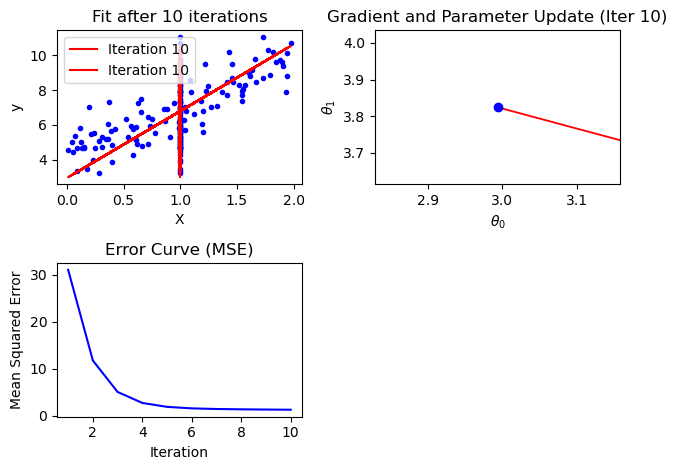

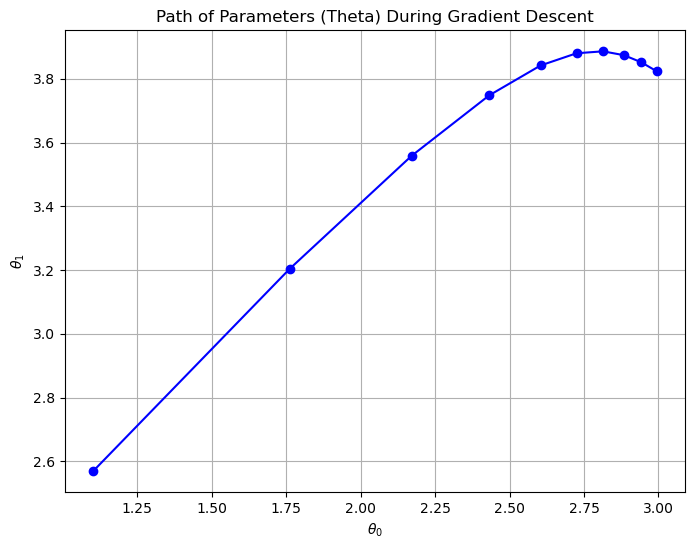

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
m = len(X)
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance

# Initialize parameters
theta = np.random.randn(2, 1)  # Random initialization
learning_rate = 0.1
n_iterations = 10  # We'll use a small number of iterations to visualize step by step

# Step 2: Visualize initial data
plt.figure(figsize=(12, 6))
plt.plot(X, y, "b.", label="Training data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data")
plt.legend()
plt.show()

# Step 3: Gradient Descent Visualization
theta_path = []
error_history = []

def plot_gradient_descent(X, y, theta, learning_rate, n_iterations):
    plt.figure(figsize=(12, 8))
    
    for iteration in range(n_iterations):
        predictions = X.dot(theta)
        residuals = predictions - y
        gradients = 2/m * X.T.dot(residuals)
        theta = theta - learning_rate * gradients
        
        # Plot the linear fit for current theta
        plt.subplot(2, 2, 1)
        plt.plot(X, y, "b.")
        plt.plot(X, predictions, "r-", label=f"Iteration {iteration + 1}")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title(f"Fit after {iteration + 1} iterations")
        plt.legend()

        # Plot the gradient
        plt.subplot(2, 2, 2)
        plt.quiver(theta[0], theta[1], -gradients[0], -gradients[1], angles="xy", scale_units="xy", scale=1, color="r")
        plt.scatter(theta[0], theta[1], color="b")
        plt.xlabel(r"$\theta_0$")
        plt.ylabel(r"$\theta_1$")
        plt.title(f"Gradient and Parameter Update (Iter {iteration + 1})")
        
        # Store theta for path visualization
        theta_path.append(theta.copy())

        # Calculate and store MSE for error curve
        mse = (1/m) * np.sum(residuals ** 2)
        error_history.append(mse)

        # Plot the error curve
        plt.subplot(2, 2, 3)
        plt.plot(range(1, iteration + 2), error_history, "b-")
        plt.xlabel("Iteration")
        plt.ylabel("Mean Squared Error")
        plt.title("Error Curve (MSE)")
        
        # Update plot with each iteration
        plt.tight_layout()
        plt.pause(0.5)  # Pause to visualize each step

    plt.show()

# Step 4: Run the Gradient Descent visualization
plot_gradient_descent(X_b, y, theta, learning_rate, n_iterations)

# Step 5: Visualize the parameter path
theta_path = np.array(theta_path)
plt.figure(figsize=(8, 6))
plt.plot(theta_path[:, 0], theta_path[:, 1], "b-o")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Path of Parameters (Theta) During Gradient Descent")
plt.grid(True)
plt.show()


Certainly! Below is an interactive Python code that illustrates the Gradient Descent process step-by-step. It includes multiple plots to help you visualize each aspect of Gradient Descent, such as the loss function, the update of the parameters, and the error curve over time.

### Explanation of the Code

1. **Data Generation**:
   - Synthetic data is generated based on a simple linear relationship with added noise.

2. **Initial Data Visualization**:
   - The first plot shows the training data points, allowing you to see the data before any model fitting occurs.

3. **Gradient Descent Visualization**:
   - The `plot_gradient_descent` function runs Gradient Descent for a small number of iterations (10 in this example) to visualize each step.
   - For each iteration:
     - The current predictions based on the model are plotted.
     - The gradient direction is visualized using arrows, showing how the parameters are updated.
     - The Mean Squared Error (MSE) is calculated and plotted to show how the error decreases over time.
   - After each iteration, the plots are updated so you can see the progress of the Gradient Descent.

4. **Parameter Path Visualization**:
   - After running the Gradient Descent, a final plot shows the path taken by the parameters (\(\theta_0\) and \(\theta_1\)) during the iterations. This illustrates how the parameters converge towards the optimal values.

### How to Use the Code

- **Iteration Visualization**: The code pauses for 0.5 seconds at each iteration to allow you to see how the parameters and the error change over time.
- **Parameter Path**: The final plot shows the trajectory of the parameters as Gradient Descent progresses, giving you a sense of how the algorithm navigates the parameter space.

### Key Concepts Illustrated

- **Gradient**: The arrows in the gradient plot show the direction and magnitude of the parameter update, helping you understand how the algorithm moves towards the minimum.
- **Learning Rate**: You can adjust the `learning_rate` to see how it affects the convergence speed and stability.
- **Error Reduction**: The error curve plot shows how the Mean Squared Error decreases with each iteration, illustrating the effectiveness of Gradient Descent in minimizing the loss function.
